# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [34]:
!pip install --upgrade numpy
!pip install --upgrade matplotlib
!pip install --upgrade scipy
!pip install --upgrade opencv-python

In [4]:
import numpy as np
from matplotlib import pyplot as plt, image as img
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

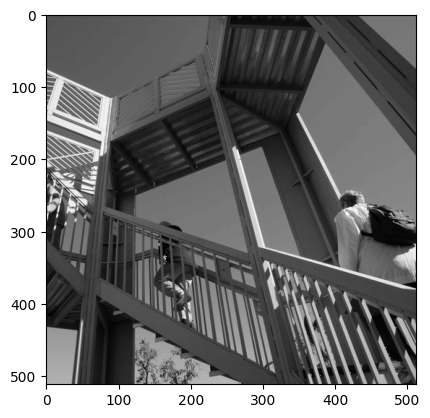

In [5]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

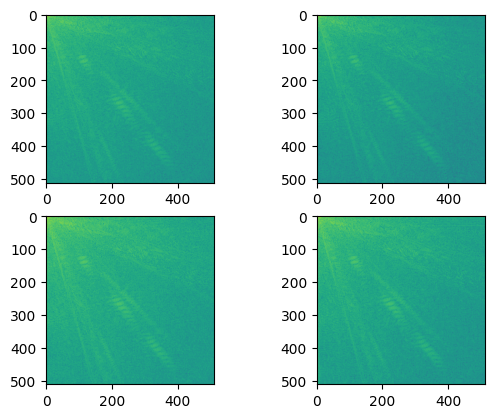

In [6]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

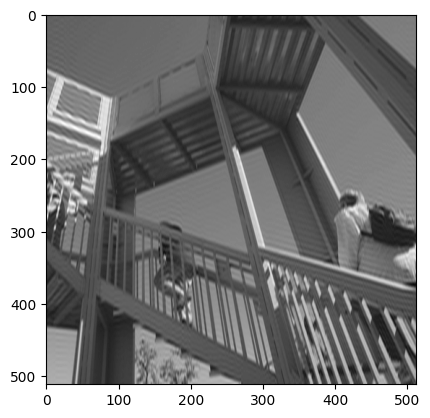

In [7]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

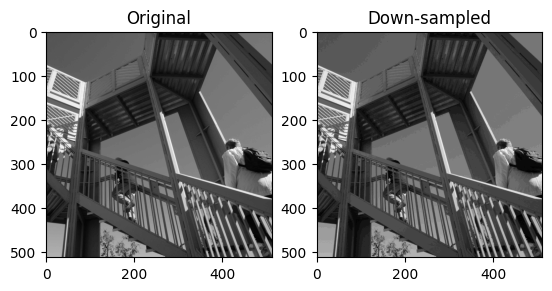

In [8]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

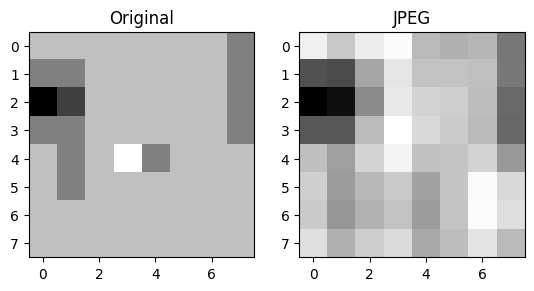

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [9]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

In [10]:
#1

def JPEG_grayscale(X: np.ndarray): 
    N, M = X.shape

    height_diff = (8 - N % 8) % 8
    width_diff = (8 - M % 8) % 8

    X = np.pad(X, ((0, height_diff), (0, width_diff)), mode='constant', constant_values=0)

    N += height_diff
    M += width_diff

    

    X_jpeg = np.empty((N, M))

    for i in range(0, N, 8):
        for j in range(0, M, 8):
            patch = X[i:i+8, j:j+8]
            
            fr_patch = dctn(patch)
            fr_patch_jpeg = Q_jpeg * np.round(fr_patch / Q_jpeg)

            patch_jpeg = idctn(fr_patch_jpeg)

            X_jpeg[i:i+8, j:j+8] = patch_jpeg

    return X_jpeg


# X = misc.face()[:, :, 0]


X = np.array(img.imread('foto.ppm', 'ppm'))[:, :, 0]

X_jpeg = JPEG_grayscale(X)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'foto.ppm'

In [ ]:
#2
def rgb_to_ycbcr(X: np.ndarray):
    offset = np.array([16, 128, 128])

    transformation_matrix = np.array([[.257, .504, .098],
                                      [-.148, -.291, .439],
                                      [.439, -.368, -.071]])

    return np.dot(X, transformation_matrix) + offset

def ycbcr_to_rgb(X: np.ndarray):
    offset = np.array([16, 128, 128])

    transformation_matrix = np.array([[1.164, 0.0, 1.596],
                                      [1.164, -.392, -.813],
                                      [1.164, 2.017, 0.0]])

    rgb_image = np.dot(X - offset, transformation_matrix)

    return np.clip(rgb_image, 0, 255).astype(np.uint8)

In [ ]:
X = misc.face()

X = rgb_to_ycbcr(X)

plt.imshow(X[:,:,0], cmap=plt.cm.gray)
plt.show()

In [ ]:
def JPEG(X: np.ndarray, increase_compression: float = 1):
    Q_jpeg_Y = increase_compression * np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 28, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]], dtype='float')

    Q_jpeg_C = increase_compression * np.array([[17, 18, 24, 47, 99, 99, 99, 99],
                [18, 21, 26, 66, 99, 99, 99, 99],
                [24, 26, 56, 99, 99, 99, 99, 99],
                [47, 66, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99]], dtype='float')
    N, M, _ = X.shape

    height_diff = (8 - N % 8) % 8
    width_diff = (8 - M % 8) % 8

    X = np.pad(X, ((0, height_diff), (0, width_diff), (0, 0)), mode='constant', constant_values=0)

    N += height_diff
    M += width_diff

    X = rgb_to_ycbcr(X)

    X_jpeg = np.empty((N, M, 3))

    for i in range(0, N, 8):
        for j in range(0, M, 8):
            patch = X[i:i+8, j:j+8]

            fr_patch_Y = dctn(patch[:, :, 0])
            fr_patch_Cb = dctn(patch[:, :, 1])
            fr_patch_Cr = dctn(patch[:, :, 2])

            fr_patch_jpeg_Y = Q_jpeg * np.round(fr_patch_Y / Q_jpeg)
            fr_patch_jpeg_Cb = Q_jpeg_C * np.round(fr_patch_Cb / Q_jpeg_C)
            fr_patch_jpeg_Cr = Q_jpeg_C * np.round(fr_patch_Cr / Q_jpeg_C)

            patch_jpeg_Y = idctn(fr_patch_jpeg_Y)
            patch_jpeg_Cb = idctn(fr_patch_jpeg_Cb)
            patch_jpeg_Cr = idctn(fr_patch_jpeg_Cr)

            X_jpeg[i:i+8, j:j+8] = np.stack([patch_jpeg_Y, patch_jpeg_Cb, patch_jpeg_Cr], axis=-1)


    X_jpeg = ycbcr_to_rgb(X_jpeg)
    return X_jpeg


In [ ]:
X = misc.face()

X_JPEG = JPEG(X)

plt.subplot(121).imshow(X)
plt.title('Original')
plt.subplot(122).imshow(X_JPEG)
plt.title('JPEG')
plt.show()

In [ ]:
#3

def repetitive_compression(X: np.ndarray, error: float):
    increase_compression = 1
    original = np.copy(X)
    X = JPEG(X)
    while np.mean(np.power(X - original, 2)) < error:
        increase_compression += 1
        X = JPEG(X, increase_compression)

    return X

In [ ]:
X = misc.face()

X_JPEG = repetitive_compression(X, error=80)

plt.subplot(121).imshow(X)
plt.title('Original')
plt.subplot(122).imshow(X_JPEG)
plt.title('JPEG')
plt.show()

In [52]:
import cv2

clip = cv2.VideoCapture('./clip.mp4')

fps = int(clip.get(cv2.CAP_PROP_FPS))

frames = []

while True:
    ret, frame = clip.read()

    if ret == 0:
        break

    frames.append(frame)

frames = np.array(frames)

print(frames.shape)

H, W = frames.shape[1:3]

print(H, W)

no_frames = frames.shape[0]

fourcc = cv2.VideoWriter.fourcc(*'mp4v')
out = cv2.VideoWriter("output.mp4", fourcc=fourcc, fps=fps, frameSize=(H, W), isColor=True)

for i, frame in enumerate(frames):
    print(f'Progress = {(i + 1) / no_frames * 100}%', flush=True)
    out.write(frame)
    # frames[i] = JPEG(frame)

out.release()

(50, 2160, 4096, 3)
2160 4096
Progress = 2.0%
Progress = 4.0%
Progress = 6.0%
Progress = 8.0%
Progress = 10.0%
Progress = 12.0%
Progress = 14.000000000000002%
Progress = 16.0%
Progress = 18.0%
Progress = 20.0%
Progress = 22.0%
Progress = 24.0%
Progress = 26.0%
Progress = 28.000000000000004%
Progress = 30.0%
Progress = 32.0%
Progress = 34.0%
Progress = 36.0%
Progress = 38.0%
Progress = 40.0%
Progress = 42.0%
Progress = 44.0%
Progress = 46.0%
Progress = 48.0%
Progress = 50.0%
Progress = 52.0%
Progress = 54.0%
Progress = 56.00000000000001%
Progress = 57.99999999999999%
Progress = 60.0%
Progress = 62.0%
Progress = 64.0%
Progress = 66.0%
Progress = 68.0%
Progress = 70.0%
Progress = 72.0%
Progress = 74.0%
Progress = 76.0%
Progress = 78.0%
Progress = 80.0%
Progress = 82.0%
Progress = 84.0%
Progress = 86.0%
Progress = 88.0%
Progress = 90.0%
Progress = 92.0%
Progress = 94.0%
Progress = 96.0%
Progress = 98.0%
Progress = 100.0%
